In [1]:
# !pip install corner
# !pip install emcee

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import emcee

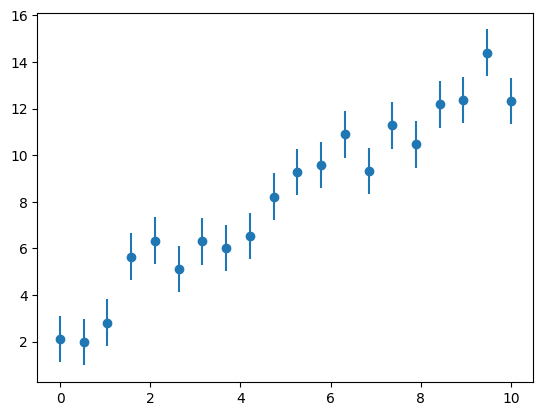

In [3]:
def model(x, params):
    k, b = params
    return k * x + b

def generate_data(params):
    num = 20
    sigma = 1
    x = np.linspace(0, 10, num)
    y_model = model(x, params)
    y_data = y_model + \
             np.random.normal(0, sigma, num)
    sigma_list = sigma * np.ones(num)
    return x, y_data, sigma_list

PARAMS_TRUE = [1, 3]
x_list, y_data_list, sigma_list = \
    generate_data(PARAMS_TRUE)

plt.errorbar(x_list, y_data_list, yerr=sigma_list, fmt='o');

In [4]:
def gaussian(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * \
           np.exp(-(x - mu)**2 / (2 * sigma**2))

In [5]:
def log_prob(pars, x_list, y_data_list, sigma_list):
    y_model_list = model(x_list, pars)
    log_likelihood = 0
    for y_data, y_model, sigma in zip(y_data_list, y_model_list, sigma_list):
        likelihood = gaussian(y_data, y_model, sigma)
        log_likelihood += np.log(likelihood)
    return log_likelihood

pars_initial = np.array([0, 2])   # (k, b) parameters of the line model

ndim = len(pars_initial)
nwalkers = 2 * ndim

start_pos = pars_initial + np.random.normal(0, 0.0001, size=(nwalkers, ndim))

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[x_list, y_data_list, sigma_list])
res = sampler.run_mcmc(start_pos, 4000)

In [6]:
samples = sampler.get_chain(flat=True)
samples.shape

(16000, 2)

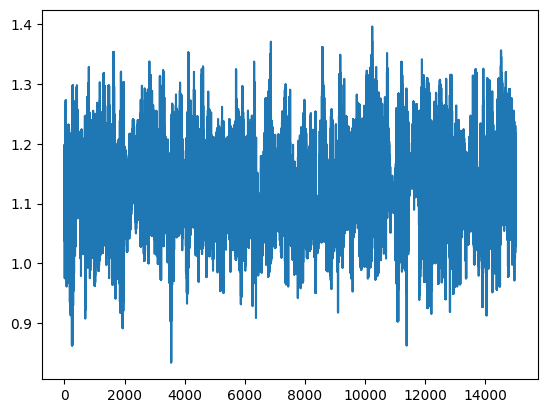

In [7]:
plt.plot(samples[1000:, 0]);

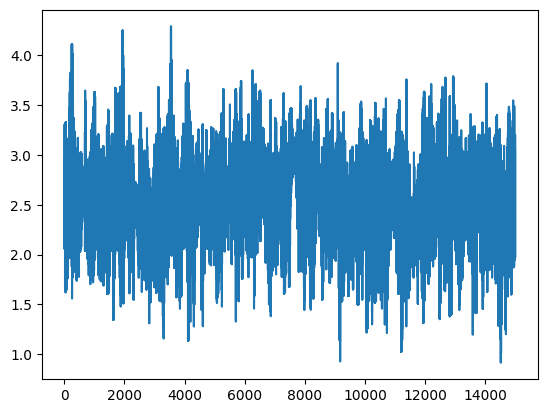

In [8]:
plt.plot(samples[1000:, 1]);

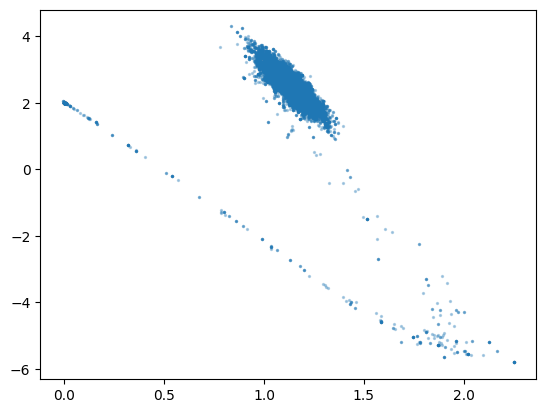

In [9]:
plt.scatter(samples[:, 0], samples[:, 1], s=2, alpha=0.3);

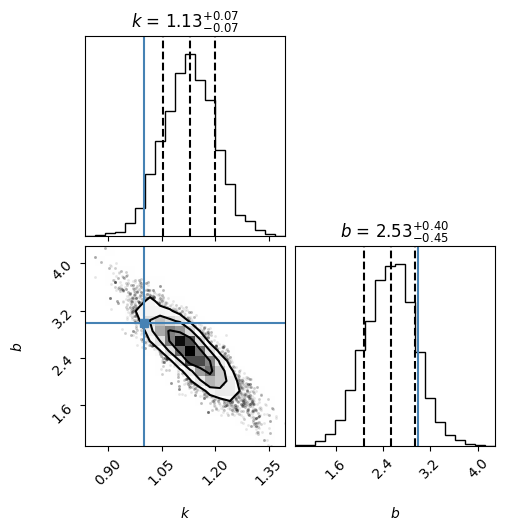

In [10]:
figure = corner.corner(
    samples[1000:],
    labels=[
        r"$k$",
        r"$b$",
    ],
    truths=PARAMS_TRUE,
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_kwargs={"fontsize": 12},
)